<a href="https://colab.research.google.com/github/jumiguelga/MaestriaCienciaDatos/blob/main/a_FundamentosCienciaDatos/Taller01/Taller01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos Ciencia de Datos - EAFIT
## Taller 1 - EDA

### Participantes
1. Andrés Felipe Velasco Hernández
2. Juan Miguel Gómez Alzate

### Materia
Fundamentos De la Ciencia de Datos

### Bases de datos
* [10000 Empresas más Grandes del País](https://www.datos.gov.co/Comercio-Industria-y-Turismo/10-000-Empresas-mas-Grandes-del-Pa-s/6cat-2gcs/about_data)
* [Oferta Formativa en Metrología](https://www.datos.gov.co/Comercio-Industria-y-Turismo/Oferta-Formativa-en-Metrolog-a-Instituto-Nacional-/upd7-iccu/about_data)
* [Gaming Hours vs Academic & Work Performance](https://www.kaggle.com/datasets/prince7489/gaming-hours-vs-academic-and-work-performance)

### Selección de la base de datos (dataset)
Luego de revisar las opciones de las bases de datos, optamos por trabajar con "*Gaming_Hours_vs_Performance_1000_Rows.csv*" ya que contaba con más filas para el análisis y su data estaba más consistente y ordenada.

Otro factor, es que Andrés es docente y Juan le gustan los juegos de computadora, por lo cual el análisis se prevee interesante para ambos.

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Esta sección de código fue implementada con ayuda de la IA para la lectura de la base de datos directamente desde la plataforma Kaggle y luego ajustada con código propio.

import os
import kagglehub
import pandas as pd

# Descarga el Data Set desde la página oficial de Kaggle:
path = kagglehub.dataset_download("prince7489/gaming-hours-vs-academic-and-work-performance")

df = pd.read_csv('/kaggle/input/gaming-hours-vs-academic-and-work-performance/Gaming_Hours_vs_Performance_1000_Rows.csv')

# Usar esta línea en caso que se vaya a correr el dataset descargado en el PC y ubicado en la misma carpeta del Notebook:
#df.read_csv('Gaming_Hours_vs_Performance_1000_Rows.csv')

df.info()
display(df.head())

Using Colab cache for faster access to the 'gaming-hours-vs-academic-and-work-performance' dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User_ID                 1000 non-null   object 
 1   Age                     1000 non-null   int64  
 2   Gender                  1000 non-null   object 
 3   Occupation              1000 non-null   object 
 4   Game_Type               1000 non-null   object 
 5   Daily_Gaming_Hours      1000 non-null   float64
 6   Weekly_Gaming_Hours     1000 non-null   float64
 7   Primary_Gaming_Time     1000 non-null   object 
 8   Sleep_Hours             1000 non-null   float64
 9   Stress_Level            1000 non-null   int64  
 10  Focus_Level             1000 non-null   int64  
 11  Academic_or_Work_Score  1000 non-null   int64  
 12  Productivity_Level      1000 non-null   int64  

,User_ID,Age,Gender,Occupation,Game_Type,Daily_Gaming_Hours,Weekly_Gaming_Hours,Primary_Gaming_Time,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level,Performance_Impact
0,U0001,21,Male,Working Professional,Action,4.0,28.0,Morning,4.6,6,4,69,66,Negative
1,U0002,35,Female,Student,Sports,1.0,7.0,Night,5.4,2,7,67,72,Neutral
2,U0003,26,Male,Student,Puzzle,2.0,14.0,Morning,8.0,4,8,82,82,Positive
3,U0004,32,Male,Working Professional,Action,1.0,7.0,Night,4.9,7,7,71,66,Neutral
4,U0005,19,Male,Working Professional,Action,2.1,14.7,Morning,7.0,7,7,67,63,Neutral



# Entendimiento del Negocio
La universidad nos ha solicitado analizar el dataset que efectúa un comparativo de horas de juego, horas de sueño, entre otros, para determinar el rendimiento en el trabajo y a nivel académico, con el fin de efectuar una campaña de acercamiento a su personal estudiantil y de planta administrativa con algunas recomendaciones, para promover espacios de dispersión sin afectar el rendimiento de la institución.

## Preguntas del Negocio
1. ¿Qué tipo de juego puede impactar de forma positiva en el performance del Trabajo o del Estudio?
2. ¿Qué recomendaciones se pueden hacer frente al uso de videojuegos dentro de las instalaciones para no afectar performance? Ejemplo: entre qué horas es recomendable tener un momento de dispersión para jugar.
3. ¿Qué variables (perfil) podrían impactar negativamente en el rendimiento académico o laboral?

## 2. Comprensión de los datos
Aquí se analizarán los datos, haciendo un overview de los datos cualitativos y los cuantitativos, se harán análisis descriptivos y así mismo, análisis univariados y multivariados.

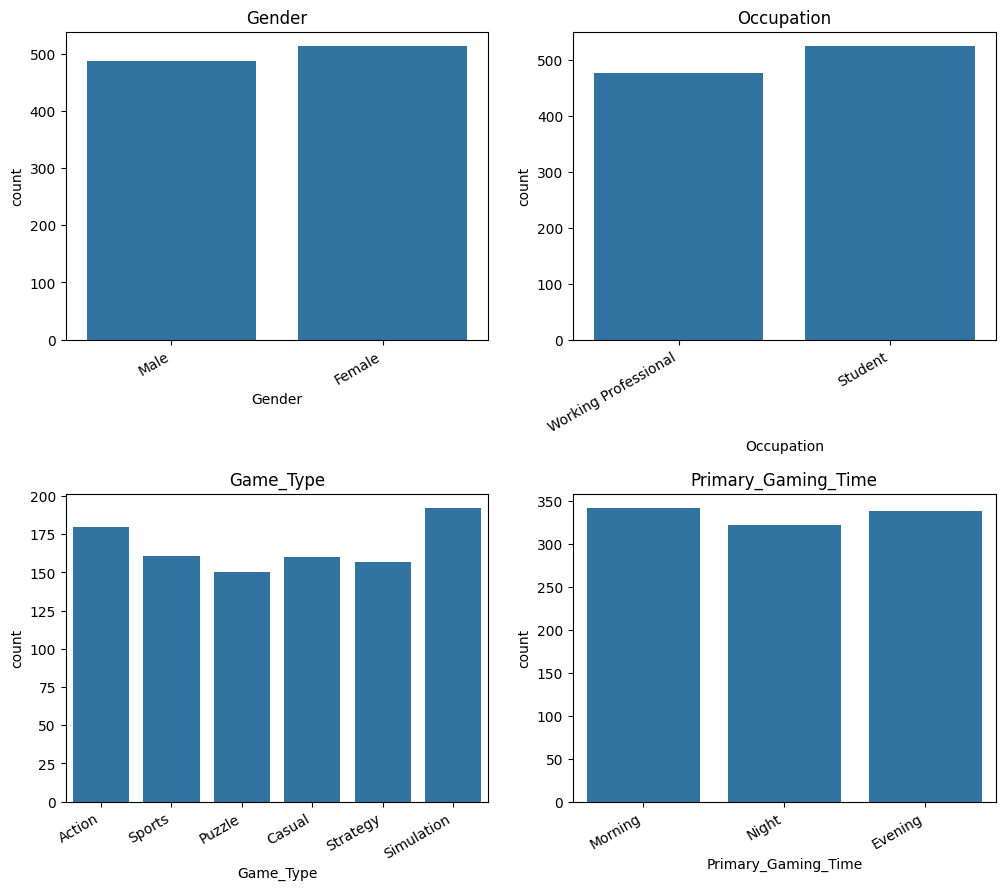

In [ ]:
#Esta sección se tomó del trabajo efectuado por Codificando Bits (2022b), y ajustado con Ia para nuestro dataset.

col_categoricas = ['Gender', 'Occupation', 'Game_Type', 'Primary_Gaming_Time']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.subplots_adjust(hspace=0.5)

# Flatten the ax array to easily iterate over each subplot
ax = ax.flatten()

for i, col in enumerate(col_categoricas):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  plt.setp(ax[i].get_xticklabels(), rotation=30, ha="right")

## Comentarios de las variables Categóricas
* Géneros: 2 (Hombre 'Male', Mujer 'Female')
* Ocupaciones: 2 (Estudiante 'Student', Trabajador 'Working Profesional')
* Tipos de Juegos: 6
* Hora principal de juego: 3 (Mañana 'Morning', Noche 'Night', Tarde 'Evening')

En general, la diferencia entre la participación de cada variable categórica es muy poca; no obstante, los tipos de juegos permite ver una preferencia por los juegos de Acción y de Simulación.

Adicionalmente, en las "pequeñas" diferencias, se evidencia que la mayor participación la tienen las Mujeres, y que los participantes que más juegan son Estudiantes.

In [ ]:
df.describe()

,Age,Daily_Gaming_Hours,Weekly_Gaming_Hours,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,26.600000,3.320300,23.242100,6.479500,5.454000,6.065000,75.07800,75.275000
std,5.207218,1.613059,11.291414,1.155848,2.281905,2.010178,11.67494,12.058805
min,18.000000,0.500000,3.500000,4.500000,2.000000,3.000000,55.00000,50.000000
25%,22.000000,2.000000,14.000000,5.475000,3.000000,4.000000,65.00000,65.000000
50%,27.000000,3.300000,23.100000,6.500000,5.000000,6.000000,75.00000,75.000000
75%,31.000000,4.800000,33.600000,7.500000,7.000000,8.000000,85.00000,86.000000
max,35.000000,6.000000,42.000000,8.500000,9.000000,9.000000,95.00000,100.000000


De los datos, se puede interpretar, para cada variable, diferentes conclusiones:


*   Edad: con un promedio en 26.6 años y un IQR de 31-22, se concluye que la población estudiada corresponde a una población adulta joven.
*   Gaming (Daily/Weekly): al comparar los promedios de ambas variables se puede observar consistencia entre los datos, pues 3.3x7=23.1, lo que da cercano al promedio semanal.
*   Horas de sueño: La población estudiada está dentro de las horas recomendadas de sueño para la edad, teniendo en cuenta la desviación estandar.
*   Estrés y concentración: los promedios, y las medianas se ubican en valores centrales, no extremos.
*   Academic/work score, nivel de productividad: el promedio y la mediana se ubican en valores medio-altos para la población.



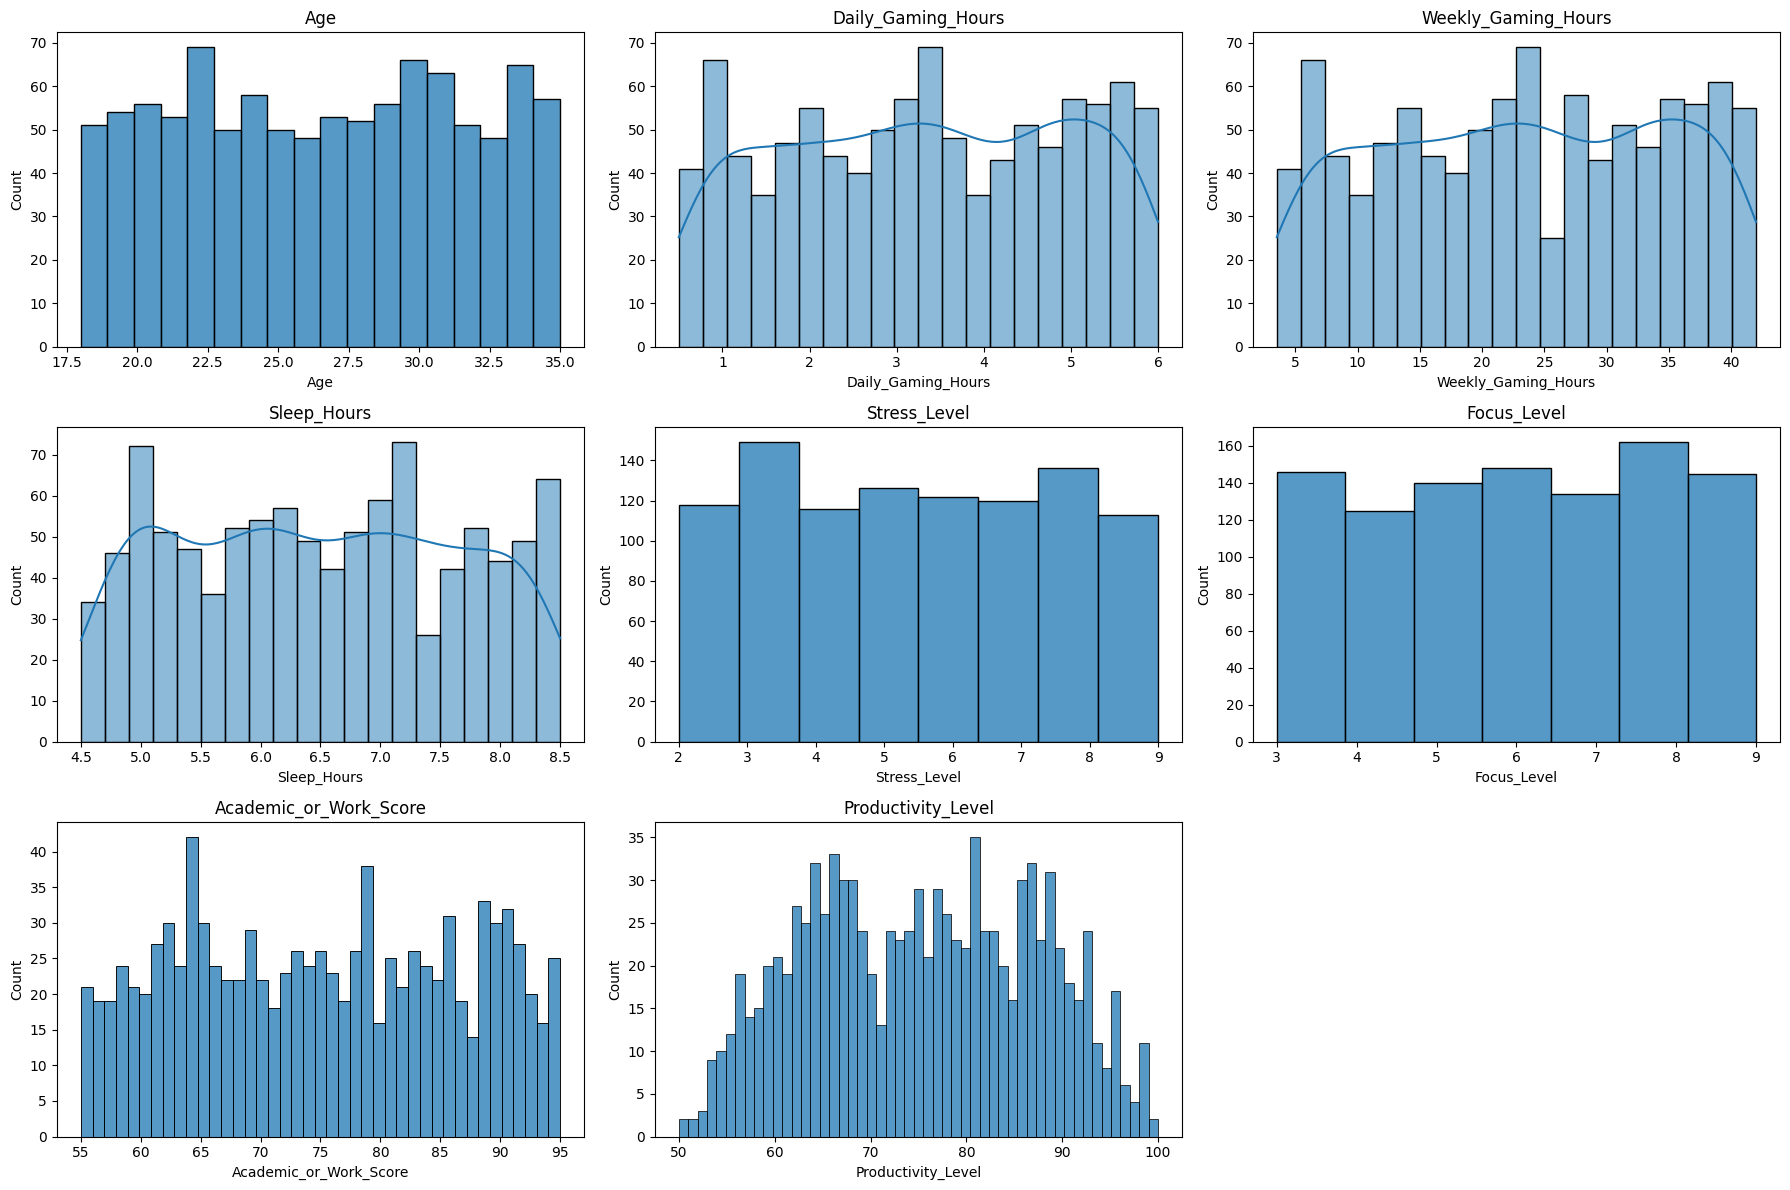

In [ ]:
import math

col_numericas = [
    'Age',
    'Daily_Gaming_Hours',
    'Weekly_Gaming_Hours',
    'Sleep_Hours',
    'Stress_Level',
    'Focus_Level',
    'Academic_or_Work_Score',
    'Productivity_Level'
]

continuas = [
    'Daily_Gaming_Hours',
    'Weekly_Gaming_Hours',
    'Sleep_Hours'
]

n_cols = 3
n_rows = math.ceil(len(col_numericas) / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(col_numericas):
    sns.histplot(
        data=df,
        x=col,
        bins = 20 if col in continuas else df[col].nunique(),
        kde=col in continuas,
        ax=axes[i]
    )
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Estas distribuciones (todas excepto nivel de productividad) permiten observar que la distribución es estable, no hay valores atípicos, los datos también se distribuyen de una manera uniforme.
En el caso de nivel de productividad, hay una tendencia mayor a tener los datos más centrados

Variables numéricas usadas en el análisis:
['Age', 'Daily_Gaming_Hours', 'Weekly_Gaming_Hours', 'Sleep_Hours', 'Stress_Level', 'Focus_Level', 'Academic_or_Work_Score', 'Productivity_Level']


<Figure size 1400x1400 with 0 Axes>

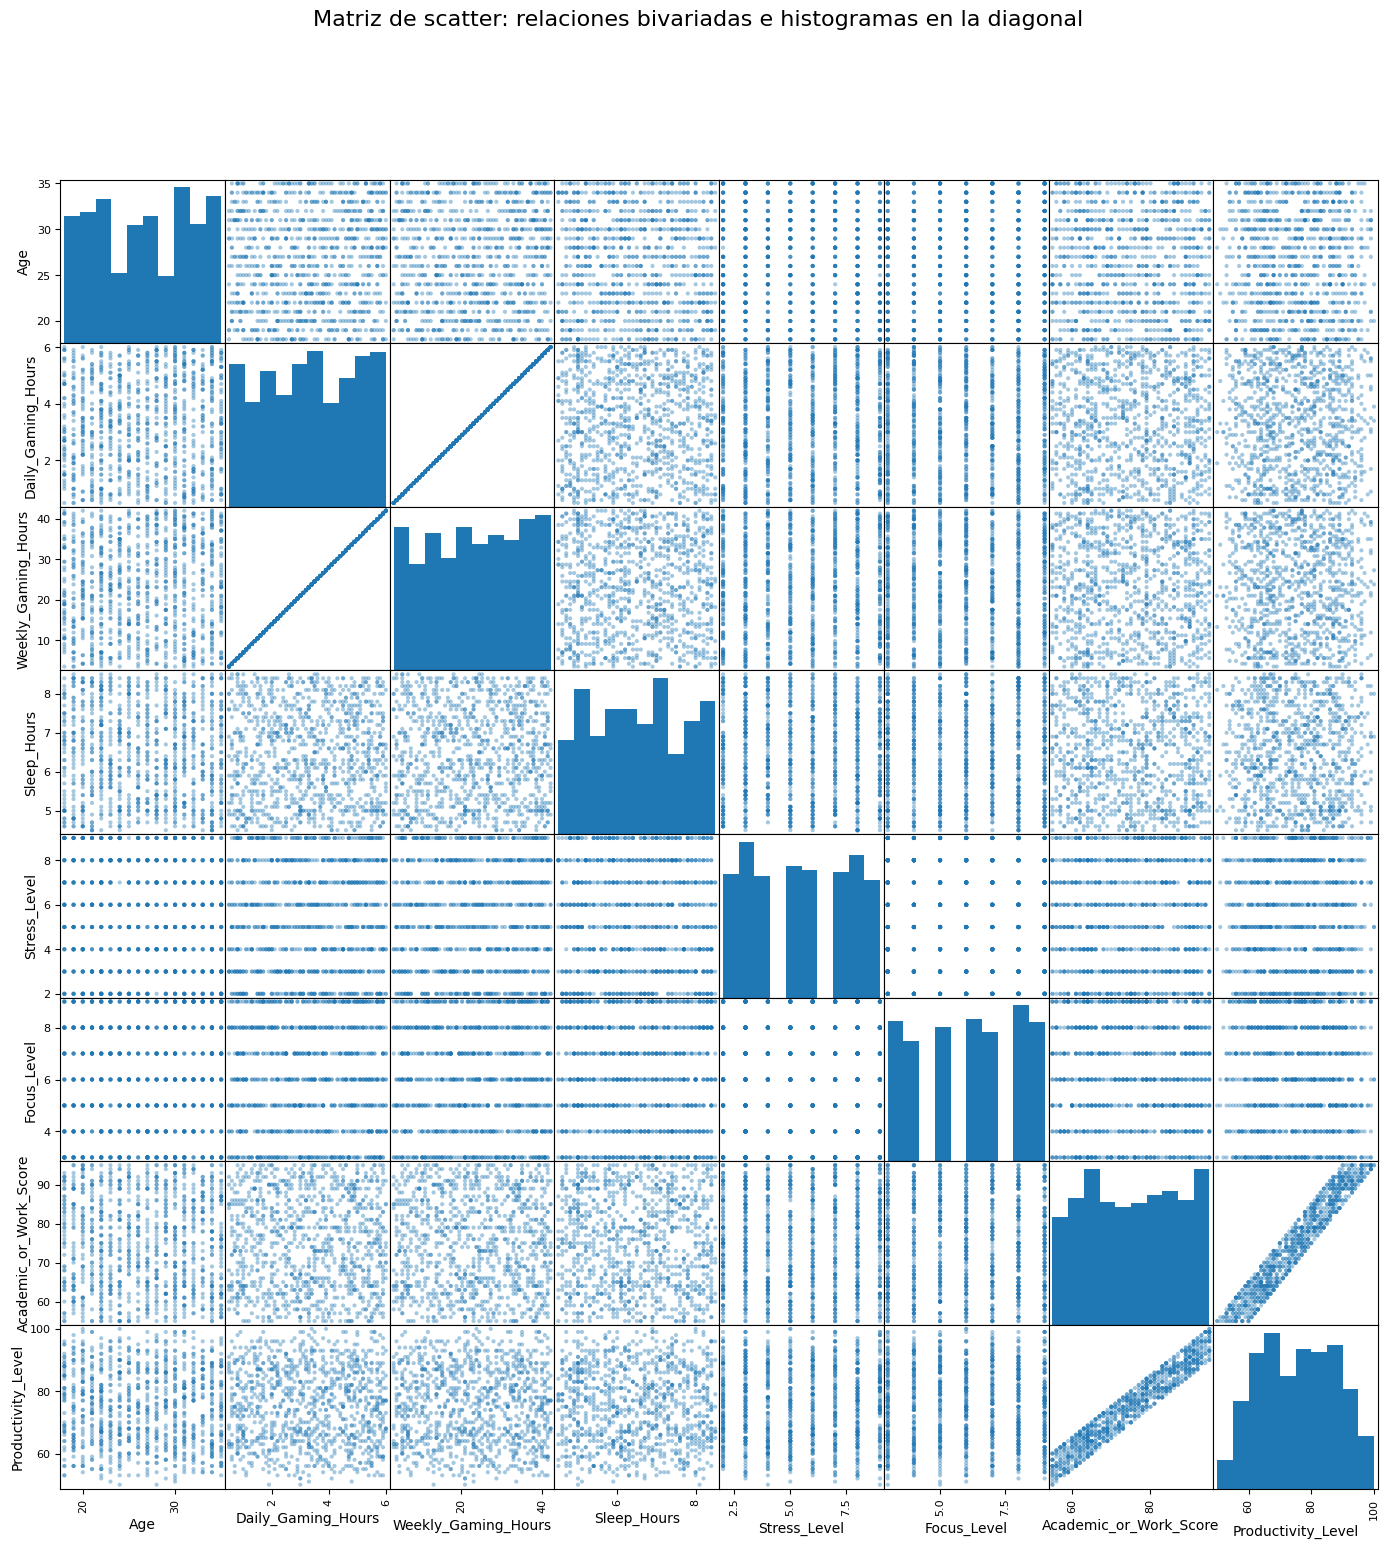

In [ ]:
from pandas.plotting import scatter_matrix

print("Variables numéricas usadas en el análisis:")

# Seleccionar solo variables numéricas de interés
num_df = df[col_numericas].dropna().copy()
print(num_df.columns.tolist())

plt.figure(figsize=(14, 14))

scatter_matrix(
    num_df,
    alpha=0.4,
    figsize=(17, 17),
    diagonal='hist'
)

plt.suptitle(
    "Matriz de scatter: relaciones bivariadas e histogramas en la diagonal",
    fontsize=16
)
plt.show()


De lo anterior se observa una correlación lineal muy fuerte entre las horas diarias y semanales de juego, lo cual confirma la coherencia interna del conjunto de datos, dado que ambas variables representan la misma magnitud en un factor de diferencia (7).

Por otro lado, se evidencia una correlación positiva significativa entre las variables de puntaje académico/laboral y el nivel de productividad. Esto sugiere una posible relación entre ambas variables.

Las demás variables no demuestran relaciones lineales entre sí, lo que sugiere que, de existir relaciones entre ellas, no sean lineales o estén mediadas por otras variables.

Puesto que se tienen variables numéricas continuas y discretas, se analizará a través de Pearson y Spearman, para buscar relaciones entre las diferentes variables.

,Performance_Impact,Performance_Impact_numeric
0,Negative,0
1,Neutral,1
2,Positive,2
3,Neutral,1
4,Neutral,1


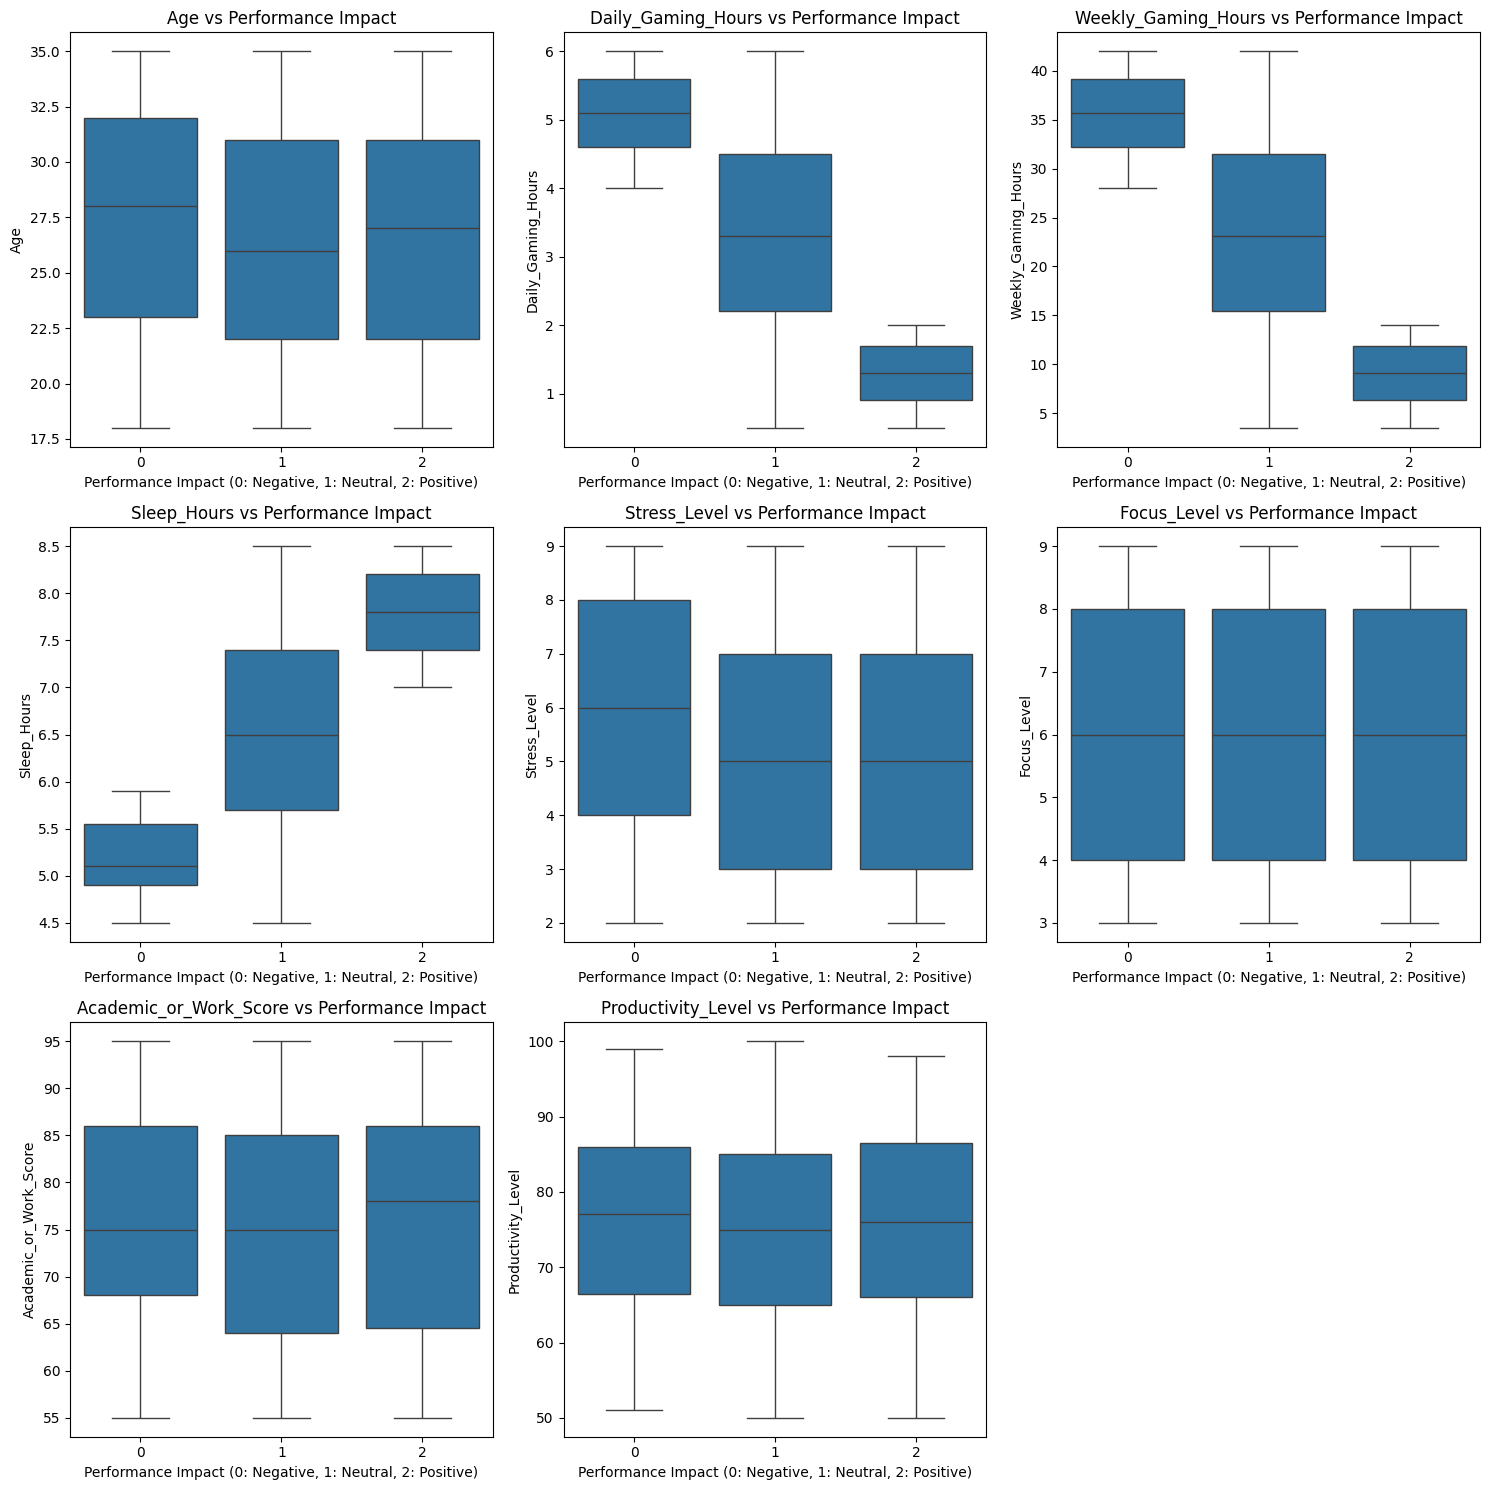

In [ ]:
#Esta sección se tomó del trabajo efectuado por Codificando Bits (2022b), y ajustado con Ia para nuestro dataset.

impact_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['Performance_Impact_numeric'] = df['Performance_Impact'].map(impact_mapping)

display(df[['Performance_Impact', 'Performance_Impact_numeric']].head())

n_cols_plot = 3
n_rows_plot = math.ceil(len(col_numericas) / n_cols_plot)

fig, axes = plt.subplots(nrows=n_rows_plot, ncols=n_cols_plot, figsize=(15, 5 * n_rows_plot))
axes = axes.flatten()

for i, col in enumerate(col_numericas):
    sns.boxplot(x="Performance_Impact_numeric", y=col, data=df, ax=axes[i])
    axes[i].set_xlabel('Performance Impact (0: Negative, 1: Neutral, 2: Positive)')
    axes[i].set_title(f'{col} vs Performance Impact')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Este primer acercamiento al comparativo de las columnas nuéricas, respecto al valor esperado (Impacto en el Performance), nos mostró que el resultado es un poco neutro, con relación a las cajas y distribución de la mediana.

No obstante, si nos dio un primer acercamiento que deja entrever que menor horas de sueño impactan negativamente en el performance, lo cual puede ocurrir con o sin horas de juego, al igual que lograr muchas horas de sueño, impacta positivamente el performance, sin que esto tenga una relación directa con el juego.

Aún así, puede existir una relación que nos diga que a mayor horas de juego, menor será el tiempo de descanso, según las demás tareas que se puedan tener en el día.

Matriz de correlación de Pearson:


,Daily_Gaming_Hours,Weekly_Gaming_Hours,Sleep_Hours
Daily_Gaming_Hours,1.000000,1.000000,0.006285
Weekly_Gaming_Hours,1.000000,1.000000,0.006285
Sleep_Hours,0.006285,0.006285,1.000000


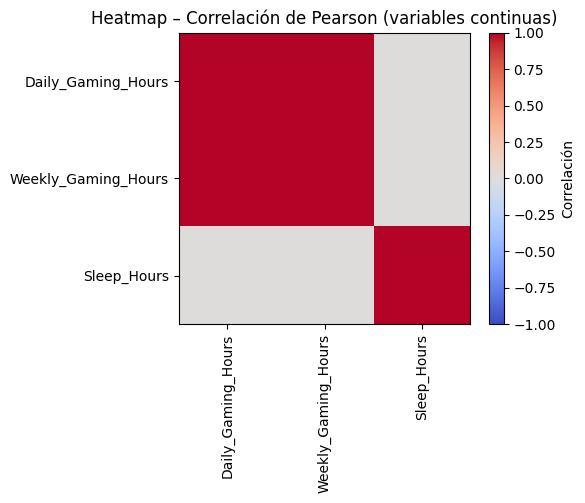

In [ ]:
import numpy as np

cont_df = num_df[continuas]

corr_pearson = cont_df.corr(method='pearson')

print("Matriz de correlación de Pearson:")
display(corr_pearson)

plt.figure(figsize=(6, 5))

plt.imshow(corr_pearson, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label="Correlación")

plt.xticks(
    ticks=np.arange(len(corr_pearson.columns)),
    labels=corr_pearson.columns,
    rotation=90
)
plt.yticks(
    ticks=np.arange(len(corr_pearson.columns)),
    labels=corr_pearson.columns
)

plt.title("Heatmap – Correlación de Pearson (variables continuas)")
plt.tight_layout()
plt.show()

Se confirma la relación perfectamente lineal entre horas diarias y semanales de juego, confirmando la consistencia interna de los datos.
Por otro lado, no se evidencia una relación lineal directa entre las horas de juego y las horas de sueño.

Matriz de correlación de Spearman:


,Age,Daily_Gaming_Hours,Weekly_Gaming_Hours,Sleep_Hours,Stress_Level,Focus_Level,Academic_or_Work_Score,Productivity_Level
Age,1.000000,0.061572,0.061572,-0.042341,-0.040807,0.048599,-0.029983,-0.033079
Daily_Gaming_Hours,0.061572,1.000000,1.000000,0.006525,0.031776,0.001994,-0.011012,-0.017096
Weekly_Gaming_Hours,0.061572,1.000000,1.000000,0.006525,0.031776,0.001994,-0.011012,-0.017096
Sleep_Hours,-0.042341,0.006525,0.006525,1.000000,-0.023302,-0.014337,-0.029329,-0.015975
Stress_Level,-0.040807,0.031776,0.031776,-0.023302,1.000000,0.004277,0.012210,0.012792
Focus_Level,0.048599,0.001994,0.001994,-0.014337,0.004277,1.000000,-0.006061,-0.011266
Academic_or_Work_Score,-0.029983,-0.011012,-0.011012,-0.029329,0.012210,-0.006061,1.000000,0.966436
Productivity_Level,-0.033079,-0.017096,-0.017096,-0.015975,0.012792,-0.011266,0.966436,1.000000


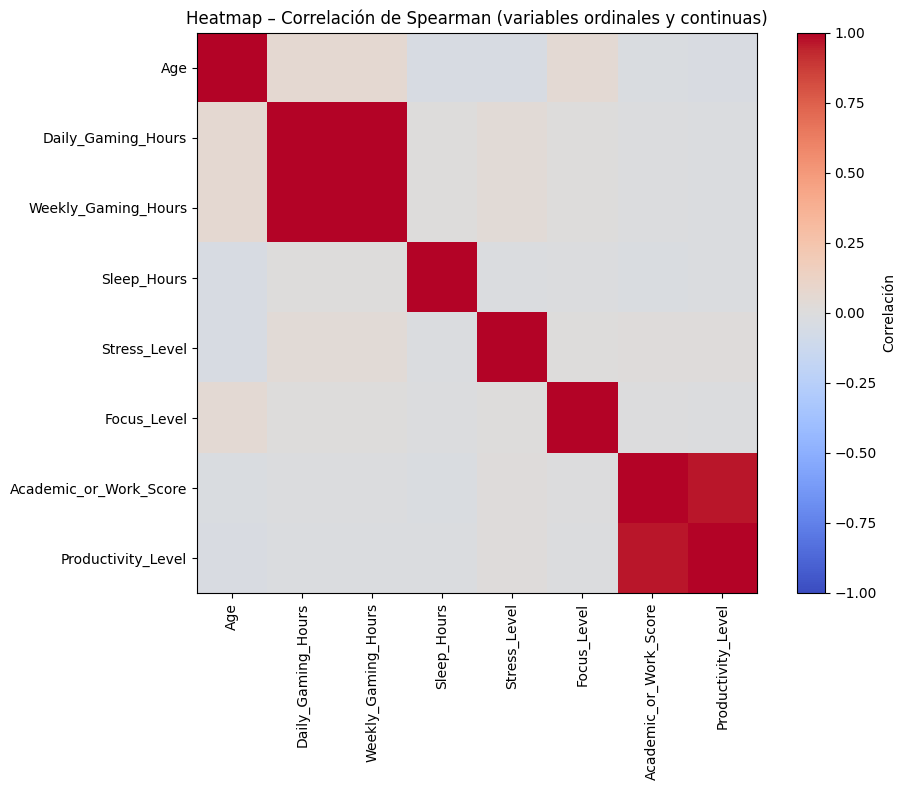

In [ ]:
corr_spearman = num_df.corr(method='spearman')

print("Matriz de correlación de Spearman:")
display(corr_spearman)

plt.figure(figsize=(10, 8))

plt.imshow(corr_spearman, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label="Correlación")

plt.xticks(
    ticks=np.arange(len(corr_spearman.columns)),
    labels=corr_spearman.columns,
    rotation=90
)
plt.yticks(
    ticks=np.arange(len(corr_spearman.columns)),
    labels=corr_spearman.columns
)

plt.title("Heatmap – Correlación de Spearman (variables ordinales y continuas)")
plt.tight_layout()
plt.show()


La prueba de correlación de Spearman confirma la relación monótona  entre las horas diarias y semanales de juego, evidenciando la redundancia entre ambas variables.
Es por esto que se sugiere el uso de una sola de las dos variables en el análisis.

Asimismo, se observa una correlación muy alta, y positiva, entre el desempeño académico/laboral y el nivel de productividad, lo que confirma que estas variables están fuertemente relacionadas.
Para el resto de las variables no se identifican asociaciones monótonas relevantes, lo que indica que, de existir relaciones, estas no siguen un patrón global creciente o decreciente.

# 3. Preparación de los datos
- Se verificó que no hubiese ausencia de datos faltantes
- Se separaron datos cualitativos y cuantitativos. Los cuantitativos también se dividieron en continuos y discretos
- Debido a las distribuciones en los datos, no fue requerido ninguna normalización de los mismos para el análisis exploratorio.
- Se realizó una transformación de los datos del impacto del performance hacia uno numérico discreto, que facilitara el análisis bajo estas categorías.

# 4. Modelamiento

En este caso, no se realizará el modelamiento, aunque se pudiera realizar para un modelo predictivo que, pudiera estimar las posibilidades del impacto en el performance dadas las condiciones abordadas en las diferentes variables analizadas.

# 5. Evaluación

Con el fin de realizar un análisis dirigido a las preguntas del negocio, se realizará un análisis segmentando las variables de interés para cada pregunta y comparando distribuciones para dar la respuesta más precisa.

In [ ]:
df_eval = df.copy()

# Asegurar variable numérica de impacto
impact_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df_eval['Performance_Impact_numeric'] = df_eval['Performance_Impact'].map(impact_mapping)

# Cuartiles para desempeño académico/laboral y productividad
df_eval['Academic_Q'] = pd.qcut(df_eval['Academic_or_Work_Score'], q=4, labels=['Q1','Q2','Q3','Q4'])
df_eval['Prod_Q'] = pd.qcut(df_eval['Productivity_Level'], q=4, labels=['Q1','Q2','Q3','Q4'])

# Grupos clave
df_eval['High_Performer'] = ((df_eval['Academic_Q'] == 'Q4') & (df_eval['Prod_Q'] == 'Q4'))
df_eval['Low_Performer']  = ((df_eval['Academic_Q'] == 'Q1') & (df_eval['Prod_Q'] == 'Q1'))

print("Tamaño de grupos:")
print(df_eval[['High_Performer','Low_Performer']].sum())
print(df_eval['Performance_Impact'].value_counts())


Tamaño de grupos:
High_Performer    203
Low_Performer     226
dtype: int64
Performance_Impact
Neutral     762
Negative    135
Positive    103
Name: count, dtype: int64


## 5.1 Tipo de juego asociado a mejor performance

Para poder hacer este análisis, se comparará la distribución en tipo de juego y los desempeños (altos y bajos); también se asociarán teniendo en cuenta el performance impact. Esto permitirá observar asociaciones entre las variables, aunque esto no necesariamente implica causalidad.

Game_Type,Action,Casual,Puzzle,Simulation,Sports,Strategy
High_Performer,,,,,,
False,0.203540,0.172566,0.150442,0.194690,0.163717,0.115044
True,0.133005,0.187192,0.147783,0.162562,0.162562,0.206897


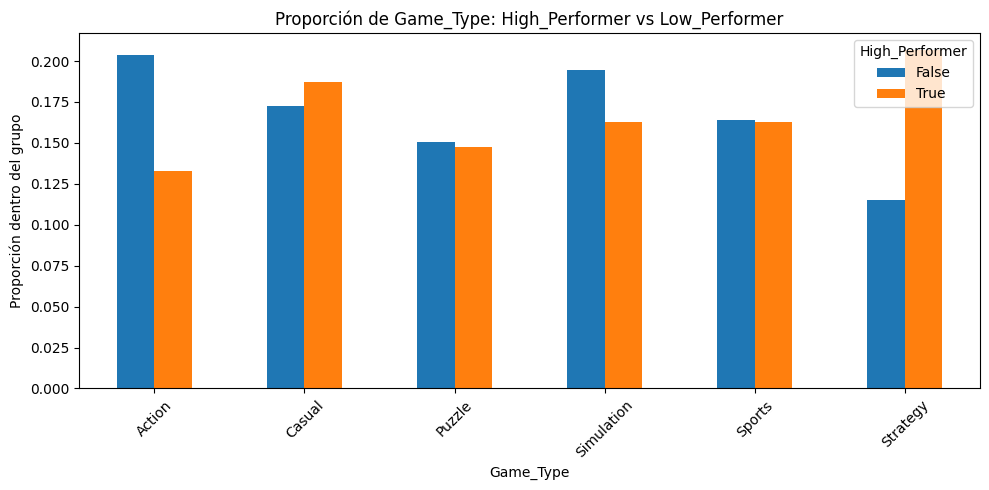

Game_Type,Action,Casual,Puzzle,Simulation,Sports,Strategy
Performance_Impact,,,,,,
Negative,0.214815,0.177778,0.170370,0.192593,0.155556,0.088889
Neutral,0.175853,0.162730,0.145669,0.191601,0.160105,0.164042
Positive,0.165049,0.116505,0.155340,0.194175,0.174757,0.194175


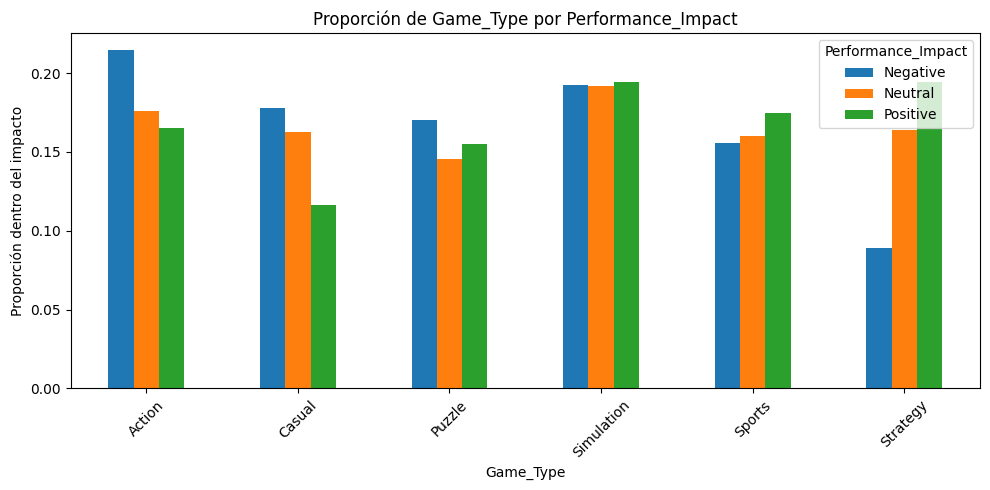

In [ ]:
# Proporción de tipos de juego en alto vs bajo desempeño
tab_hl = pd.crosstab(
    df_eval.loc[df_eval['High_Performer'] | df_eval['Low_Performer'], 'High_Performer'],
    df_eval.loc[df_eval['High_Performer'] | df_eval['Low_Performer'], 'Game_Type'],
    normalize='index'
)

display(tab_hl)

ax = tab_hl.T.plot(kind='bar', figsize=(10,5))
ax.set_title("Proporción de Game_Type: High_Performer vs Low_Performer")
ax.set_ylabel("Proporción dentro del grupo")
ax.set_xlabel("Game_Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Game_Type vs Performance_Impact (proporciones)


tab_impact = pd.crosstab(df_eval['Performance_Impact'], df_eval['Game_Type'], normalize='index')
display(tab_impact)

ax = tab_impact.T.plot(kind='bar', figsize=(10,5))
ax.set_title("Proporción de Game_Type por Performance_Impact")
ax.set_ylabel("Proporción dentro del impacto")
ax.set_xlabel("Game_Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Conclusión – Pregunta 1**

El análisis de la distribución de tipos de juego, por nivel de impacto en el desempeño, muestra que los juegos de tipo Sports y Strategy presentan una mayor proporción relativa en el grupo con impacto positivo, mientras que los juegos Action y Casual aparecen con mayor frecuencia en los grupos con impacto negativo o neutral.

Estos resultados sugieren el tipo de juego que se asocia con el desempeño académico o laboral, aunque no se puede establecer una relación causal.

**Recomendación para la universidad**

- Evitar políticas generalizadas de prohibición por tipo de videojuego.

- Considerar enfoques diferenciados, priorizando el uso responsable y el acompañamiento, especialmente en juegos más asociados a impacto negativo.



# 5.2 Recomendaciones para uso dentro de las instalaciones

Como resultado de hacer este análisis, se busca sugerir el tiempo de juego y los momentos relacionados con el mejor performance.
Con este fin:
- se recogerán las horas de juego para perfiles de alto valor de desempeño, tomado como los valores en el cuartil superior para performance académico/trabajo y productividad.
- se revisará la distribución de los momentos de juego en desempeño alto y en impacto positivo y neutral.


,count,mean,std,min,25%,50%,75%,max
Daily_Gaming_Hours,203.0,3.221182,1.527956,0.5,1.9,3.2,4.55,6.0
Weekly_Gaming_Hours,203.0,22.548276,10.695689,3.5,13.3,22.4,31.85,42.0
Sleep_Hours,203.0,6.491133,1.130679,4.6,5.5,6.5,7.40,8.5


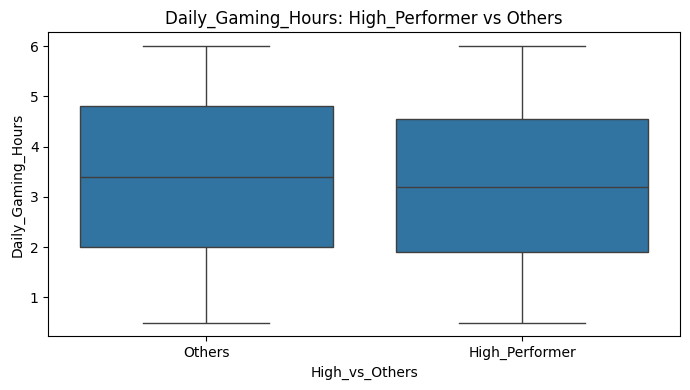

col_0,prop
Primary_Gaming_Time,
Night,0.359606
Morning,0.325123
Evening,0.315271


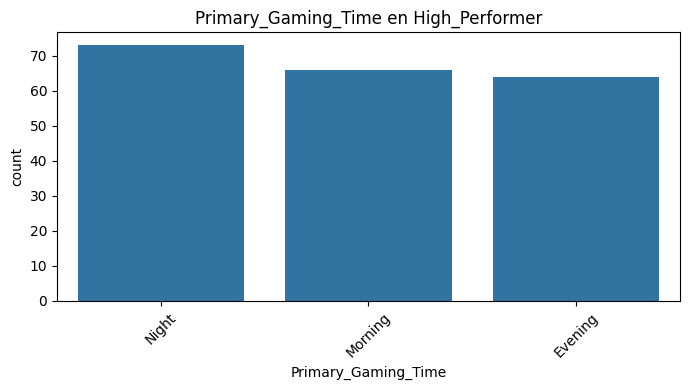

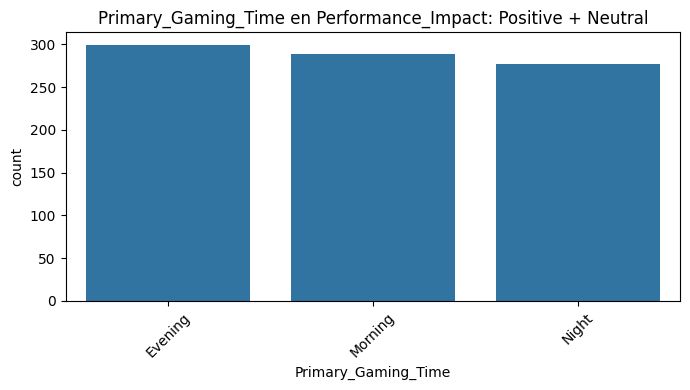

In [ ]:
# Horas de juego en High_Performer


hp = df_eval[df_eval['High_Performer']].copy()

summary_hours = hp[['Daily_Gaming_Hours','Weekly_Gaming_Hours','Sleep_Hours']].describe().T
display(summary_hours)

# Boxplot comparativo High vs No-High para Daily_Gaming_Hours
df_eval['High_vs_Others'] = np.where(df_eval['High_Performer'], 'High_Performer', 'Others')

plt.figure(figsize=(7,4))
sns.boxplot(data=df_eval, x='High_vs_Others', y='Daily_Gaming_Hours')
plt.title("Daily_Gaming_Hours: High_Performer vs Others")
plt.tight_layout()
plt.show()

# Primary_Gaming_Time en alto desempeño

tab_time_hp = pd.crosstab(hp['Primary_Gaming_Time'], columns='prop', normalize=True).sort_values('prop', ascending=False)
display(tab_time_hp)

plt.figure(figsize=(7,4))
sns.countplot(data=hp, x='Primary_Gaming_Time', order=hp['Primary_Gaming_Time'].value_counts().index)
plt.title("Primary_Gaming_Time en High_Performer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Primary_Gaming_Time en Positive + Neutral

pos_neu = df_eval[df_eval['Performance_Impact'].isin(['Positive','Neutral'])].copy()

plt.figure(figsize=(7,4))
sns.countplot(data=pos_neu, x='Primary_Gaming_Time', order=pos_neu['Primary_Gaming_Time'].value_counts().index)
plt.title("Primary_Gaming_Time en Performance_Impact: Positive + Neutral")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Conclusión - Pregunta 2**

Los estudiantes o trabajadores con alto desempeño presentan cantidades de horas diarias de juego muy similares al resto de la población, manteniéndose mayoritariamente dentro de un rango moderado (aprox. 2 a 4.5 horas diarias).
El horario principal de juego (mañana, tarde o noche) no muestra una asociación fuerte con el desempeño, aunque el juego en la franja de la tarde aparece ligeramente más frecuente en perfiles de impacto positivo o neutral.

**Recomendaciones para la universidad**

- Permitir espacios de juego recreativo controlado, evitando prohibiciones absolutas.

- Favorecer: sesiones cortas, uso preferente en franjas de la tarde pausas activas reguladas.

- Evitar: sesiones prolongadas, uso nocturno excesivo que afecte el descanso.

# 5.3 Perfiles que impactan negativamente

Aquí se compararán los perfiles con bajo desempeño (cuartil 1 para académico/laboral y productividad) y/o impacto negativo en el performance, indagando en:

- Sleep
- Stress
- Focus
- Gaming hours


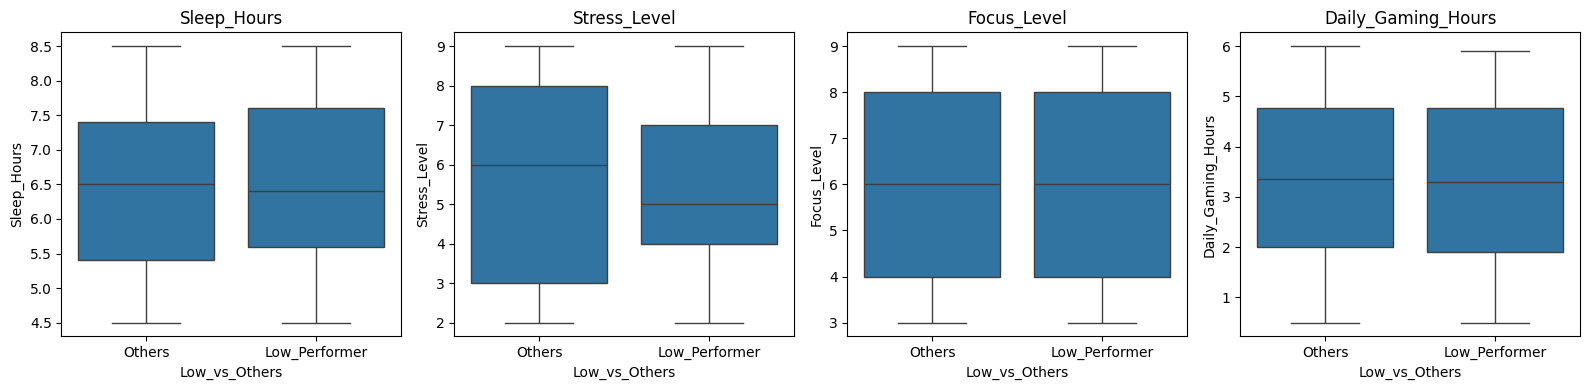

,Sleep_Hours,Stress_Level,Focus_Level,Daily_Gaming_Hours
Low_vs_Others,,,,
Low_Performer,6.4,5.0,6.0,3.30
Others,6.5,6.0,6.0,3.35


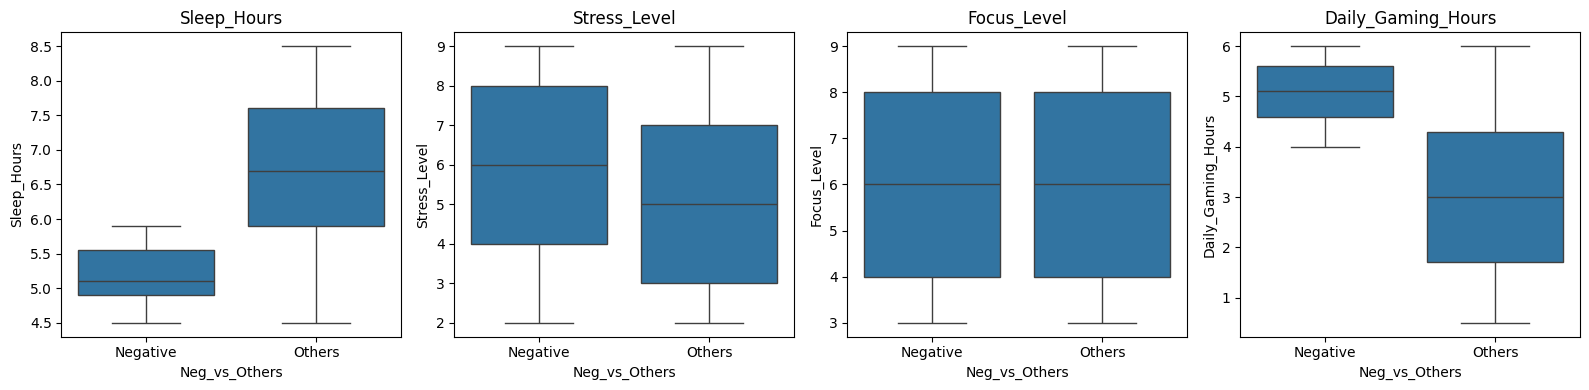

,Sleep_Hours,Stress_Level,Focus_Level,Daily_Gaming_Hours
Neg_vs_Others,,,,
Negative,5.1,6.0,6.0,5.1
Others,6.7,5.0,6.0,3.0


In [ ]:
# Comparación Low_Performer vs Others


df_eval['Low_vs_Others'] = np.where(df_eval['Low_Performer'], 'Low_Performer', 'Others')

vars_riesgo = ['Sleep_Hours','Stress_Level','Focus_Level','Daily_Gaming_Hours']

fig, axes = plt.subplots(1, len(vars_riesgo), figsize=(4*len(vars_riesgo), 4))
for i, v in enumerate(vars_riesgo):
    sns.boxplot(data=df_eval, x='Low_vs_Others', y=v, ax=axes[i])
    axes[i].set_title(v)
plt.tight_layout()
plt.show()

# Tabla resumen por grupo
summary_low = df_eval.groupby('Low_vs_Others')[vars_riesgo].median()
display(summary_low)

# Impacto negativo vs no negativo

df_eval['Neg_vs_Others'] = np.where(df_eval['Performance_Impact']=='Negative', 'Negative', 'Others')

fig, axes = plt.subplots(1, len(vars_riesgo), figsize=(4*len(vars_riesgo), 4))
for i, v in enumerate(vars_riesgo):
    sns.boxplot(data=df_eval, x='Neg_vs_Others', y=v, ax=axes[i])
    axes[i].set_title(v)
plt.tight_layout()
plt.show()

summary_neg = df_eval.groupby('Neg_vs_Others')[vars_riesgo].median()
display(summary_neg)



**Conclusión – Pregunta 3**

El análisis muestra que el impacto negativo en el desempeño se asocia claramente con un perfil caracterizado por:

- menor cantidad de horas de sueño,

- mayores niveles de estrés,

- un número elevado de horas diarias de juego.

En contraste, el perfil de bajo rendimiento estructural (low performer) no presenta diferencias significativas en estas variables, lo que sugiere que el bajo desempeño sostenido podría estar influenciado por factores no observados en este conjunto de datos.

**Recomendaciones para la universidad**

- Utilizar estas variables como indicadores de alerta temprana.

- Priorizar estrategias de: acompañamiento, orientación en hábitos de sueño, manejo del estrés, regulación del tiempo de juego.

# 6. Despliegue

Los resultados de este análisis pueden ser utilizados por la universidad para apoyar la toma de decisiones relacionadas con el uso responsable de videojuegos dentro del campus. En particular, pueden servir como insumo para:

- el diseño de políticas diferenciadas de uso de videojuegos,
- la implementación de espacios recreativos controlados,
- el fortalecimiento de programas de bienestar estudiantil,
- la identificación temprana de perfiles de riesgo asociados a hábitos de sueño, estrés y uso excesivo de videojuegos.

Este análisis permite pasar de una visión punitiva del uso de videojuegos a un enfoque preventivo y de acompañamiento.

## Limitaciones y trabajo futuro

Este estudio se basa en un análisis exploratorio de datos observacionales, por lo que no permite establecer relaciones causales entre el uso de videojuegos y el desempeño académico o laboral. Asimismo, variables contextuales adicionales (hábitos de estudio, carga académica, condiciones socioeconómicas, entre otras) no fueron consideradas.

Como trabajo futuro, se propone:
- incorporar análisis longitudinales,
- explorar modelos predictivos supervisados,
- incluir variables adicionales relacionadas con bienestar y contexto académico.


### Uso de herramientas de Inteligencia Artificial

Durante el desarrollo de este trabajo se utilizó una herramienta de Inteligencia Artificial generativa (ChatGPT) como apoyo.

Las decisiones analíticas, la selección de variables, la construcción de los análisis exploratorios, la interpretación de los resultados y las conclusiones finales fueron realizadas de manera crítica por los autores, basadas en el análisis directo de los datos.


Para el readme:
# Taller 01 – Análisis Exploratorio de Datos (EDA)
## Gaming Hours vs Academic and Work Performance

Este repositorio presenta el desarrollo del Taller 01 de Análisis Exploratorio de Datos (EDA), realizado en el marco de la Maestría en Ciencias de los Datos y Analítica de la Universidad EAFIT. El trabajo se estructura a partir de la metodología CRISP-DM y tiene como propósito analizar la relación entre el uso de videojuegos y el desempeño académico o laboral, desde una perspectiva orientada a la toma de decisiones institucionales.

---

## Objetivo del proyecto

Analizar la relación entre los hábitos de juego (tipo de videojuego, horas y momentos de uso), variables asociadas al bienestar (sueño, estrés y nivel de concentración) y el desempeño académico o laboral, con el fin de generar recomendaciones informadas para una institución educativa sobre el uso responsable de videojuegos dentro de sus instalaciones.

---

## Metodología: CRISP-DM

El proyecto sigue las fases de la metodología CRISP-DM, aplicadas de la siguiente manera:

1. **Business Understanding**  
   Se formulan tres preguntas de negocio desde la perspectiva de una universidad:
   - ¿Qué tipo de videojuego se asocia con un mejor desempeño académico o laboral?
   - ¿Qué recomendaciones pueden formularse respecto al uso de videojuegos dentro de las instalaciones para no afectar el rendimiento?
   - ¿Qué variables del perfil de estudiantes o trabajadores podrían asociarse con un impacto negativo en el desempeño?

2. **Data Understanding**  
   Exploración inicial del conjunto de datos, incluyendo la descripción de las variables, el análisis de distribuciones, la identificación de valores atípicos y la exploración de posibles relaciones entre variables.

3. **Data Preparation**  
   Procesos de limpieza, selección de variables relevantes, generación de segmentaciones por niveles de desempeño e impacto, y preparación de subconjuntos para el análisis exploratorio.

4. **Modeling**  
   En este taller no se desarrollan modelos predictivos. El análisis se centra en técnicas exploratorias (visualización, segmentación y análisis de correlaciones) con el objetivo de identificar patrones relevantes.

5. **Evaluation**  
   Interpretación de los resultados del EDA para responder de manera explícita a las preguntas de negocio y traducir los hallazgos en recomendaciones prácticas para la universidad.

6. **Deployment**  
   Discusión sobre el uso institucional de los resultados como insumo para la formulación de políticas de bienestar, uso responsable de videojuegos y estrategias de acompañamiento preventivo.

---

## Dataset

- **Fuente:** Kaggle – Gaming Hours vs Academic and Work Performance
- **Número de observaciones:** 1000 registros  
- **Variables principales:**
  - Demográficas: `Age`, `Gender`, `Occupation`
  - Hábitos de juego: `Game_Type`, `Daily_Gaming_Hours`, `Weekly_Gaming_Hours`, `Primary_Gaming_Time`
  - Bienestar: `Sleep_Hours`, `Stress_Level`, `Focus_Level`
  - Desempeño: `Academic_or_Work_Score`, `Productivity_Level`, `Performance_Impact`

---

## Estructura del repositorio

```text
├── Taller01_EDA.ipynb        # Notebook principal con el análisis completo
├── Gaming_Hours_vs_Performance_1000_Rows.csv # Base de datos usada para el análisis
├── README.md                # Descripción del proyecto


# Referencia Bibliográfica
Codificando Bits. (2022, 23 diciembre). Tutorial: ANÁLISIS EXPLORATORIO DE DATOS con Python [Vídeo]. YouTube. https://www.youtube.com/watch?v=wBu0hQQVdcE